<a href="https://colab.research.google.com/github/AbdulxoliqMirzayev/Deep-Learning/blob/main/Cat_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fastai.vision.all import *
from ipywidgets import widgets
from fastai.vision.widgets import *

path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()

dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat,
    item_tfms=Resize(224))

learn = cnn_learner(dls,resnet34, metrics=accuracy)
learn.fine_tune(2)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 84.4MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.163407,0.023722,0.991204,01:02


epoch,train_loss,valid_loss,accuracy,time
0,0.072410,0.063173,0.983762,00:51
1,0.034087,0.011774,0.996617,00:55


In [2]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Mushukmi ?: True
Aniqlilik ehtimolligi : 1.000


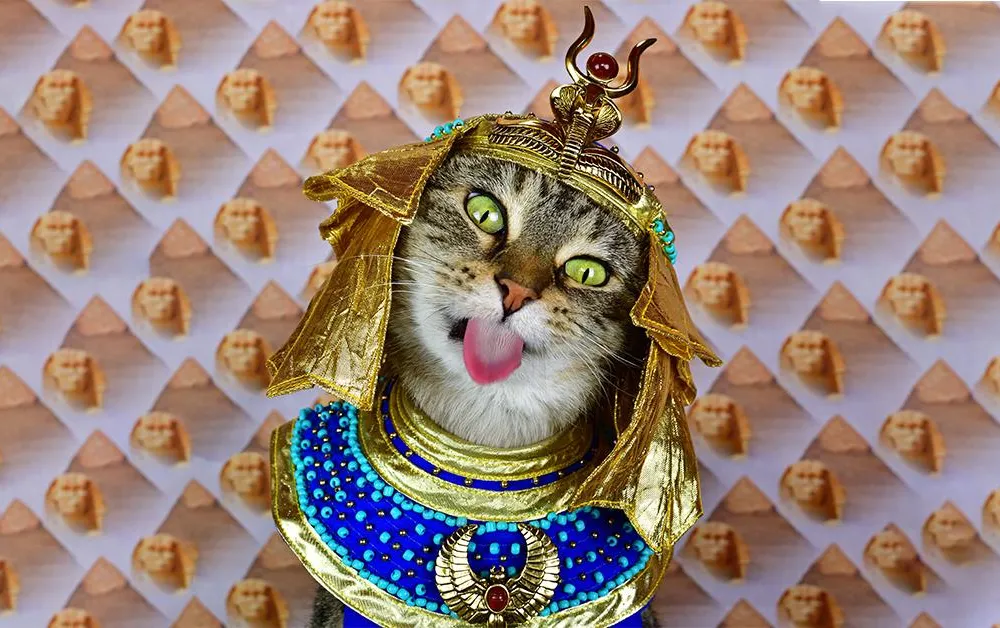

In [6]:
img = PILImage.create(upload.data[-1])
pred, _, prob = learn.predict(img)
print(f'Mushukmi ?: {pred}')
print(f'Aniqlilik ehtimolligi : {prob[1].item():.3f}')
img